In [1]:
import sqlite3


In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("DROP TABLE IF EXISTS sales")

In [4]:
cursor.execute("""
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [5]:
sample_data = [
    ("Laptop", 3, 50000),
    ("Laptop", 2, 52000),
    ("Mobile", 5, 15000),
    ("Mobile", 3, 18000),
    ("Tablet", 4, 25000),
    ("Tablet", 1, 23000),
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)

In [6]:
conn.commit()
conn.close()

In [7]:
print("sales_data.db created successfully!")

sales_data.db created successfully!


In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
conn = sqlite3.connect("sales_data.db")

In [12]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [13]:
df = pd.read_sql_query(query, conn)

In [14]:
print(df)

  product  total_qty   revenue
0  Laptop          5  254000.0
1  Mobile          8  129000.0
2  Tablet          5  123000.0


<Figure size 600x400 with 0 Axes>

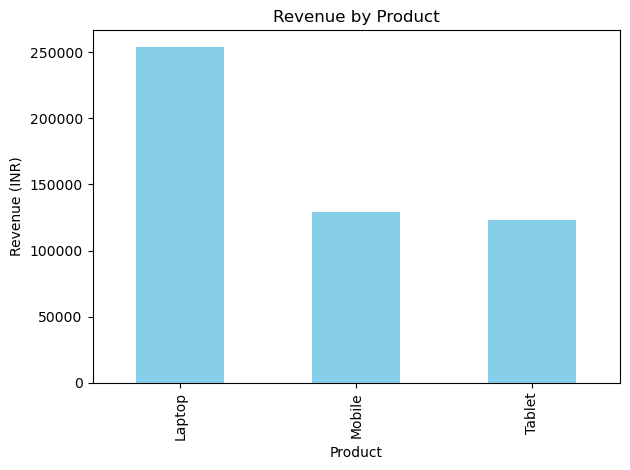

In [15]:
plt.figure(figsize=(6,4))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [16]:
conn.close()